In [1]:
#Habilitar intellisense
%config IPCompleter.greedy = True

In [2]:
%matplotlib inline

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import csv
import re

## Práctica

Empleando los datos sobre automóviles extraidos en un archivo csv via webscraping. Responda la siguientes preguntas:

- La asimetría de la variable "caballos_potencia" es negativa?
- Entre estas variables: "caballos_potencia", "desplazamiento", "mpg"y  "aceleracion", cuáles tienen valores atípicos en ambos entremos?
- Entre estas variables: "caballos_potencia", "desplazamiento", "mpg"y  "aceleracion", cuáles no tienen valores atípicos?
- Entre estas variables: "caballos_potencia", "desplazamiento", "mpg"y  "aceleracion", cuáles son las variable con mayor y menor asimetría?.
- Entre estas variables: "caballos_potencia", "desplazamiento", "mpg"y  "aceleracion", muestre los valores atípicos de aquellas variables que los tengan en ambos extremos.

In [4]:
autos = pd.read_csv('datos_automoviles.csv')
autos.head()

,nombre,cilindros,peso,anio,territorio,aceleracion,mpg,caballos_potencia,desplazamiento
0,Chevrolet Chevelle Malibu,8,3504,1970,USA,12.0,18.0,130.0,307.0
1,Buick Skylark 320,8,3693,1970,USA,11.5,15.0,165.0,350.0
2,Plymouth Satellite,8,3436,1970,USA,11.0,18.0,150.0,318.0
3,Amc Rebel Sst,8,3433,1970,USA,12.0,16.0,150.0,304.0
4,Ford Torino,8,3449,1970,USA,10.5,17.0,140.0,302.0


In [5]:
autos_descripcion = autos.describe()
autos_descripcion

,cilindros,peso,anio,aceleracion,mpg,caballos_potencia,desplazamiento
count,406.000000,406.000000,406.000000,406.000000,398.000000,400.000000,406.000000
mean,5.475369,2979.413793,1975.921182,15.519704,23.514573,105.082500,194.779557
std,1.712160,847.004328,3.748737,2.803359,7.815984,38.768779,104.922458
min,3.000000,1613.000000,1970.000000,8.000000,9.000000,46.000000,68.000000
25%,4.000000,2226.500000,1973.000000,13.700000,17.500000,75.750000,105.000000
50%,4.000000,2822.500000,1976.000000,15.500000,23.000000,95.000000,151.000000
75%,8.000000,3618.250000,1979.000000,17.175000,29.000000,130.000000,302.000000
max,8.000000,5140.000000,1982.000000,24.800000,46.600000,230.000000,455.000000


Asimetría caballos de fuerza
1.034079427703104


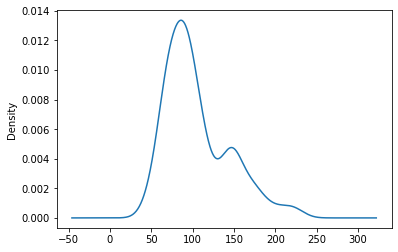

In [30]:
asimetria_caballos_potencia = autos['caballos_potencia'].skew()
asimetria_desplazamiento = autos['desplazamiento'].skew()
asimetria_mpg = autos['mpg'].skew()
asimetria_aceleracion = autos['aceleracion'].skew()
print('Asimetría caballos de fuerza')
print(asimetria_caballos_potencia)

autos['caballos_potencia'].plot.density()

In [16]:
IQR = autos_descripcion['caballos_potencia']['75%'] - autos_descripcion['caballos_potencia']['25%']
limite_izquierdo = autos_descripcion['caballos_potencia']['25%'] - 1.5*IQR
limite_derecho = autos_descripcion['caballos_potencia']['75%'] + 1.5*IQR
print(f'Izquierda: {limite_izquierdo}  -  Derecha: {limite_derecho}')
valores_atipicos_uno = autos.loc[(autos['caballos_potencia'] >= limite_derecho)]
valores_atipicos_dos = autos.loc[(autos['caballos_potencia'] <= limite_izquierdo)]
valores_atipicos = pd.concat([valores_atipicos_dos, valores_atipicos_uno])
print(valores_atipicos.size)

Izquierda: -5.625  -  Derecha: 211.375
72


Izquierda: -87.0  -  Derecha: 292.75
0


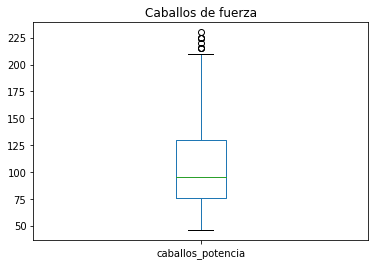

In [29]:
limite_izquierdo_extremo = autos_descripcion['caballos_potencia']['25%'] - 3.0*IQR
limite_derecho_extremo = autos_descripcion['caballos_potencia']['75%'] + 3.0*IQR
print(f'Izquierda: {limite_izquierdo_extremo}  -  Derecha: {limite_derecho_extremo}')

valores_atipicos_extremos_uno = autos.loc[(autos['caballos_potencia'] >= limite_derecho_extremo)]
valores_atipicos_extremos_dos = autos.loc[(autos['caballos_potencia'] <= limite_izquierdo_extremo)]
valores_atipicos_extremos = pd.concat([valores_atipicos_extremos_uno, valores_atipicos_extremos_dos])
print(valores_atipicos_extremos.size)

autos['caballos_potencia'].plot.box(title='Caballos de fuerza')

Asimetría desplazamiento
0.6941299865999901


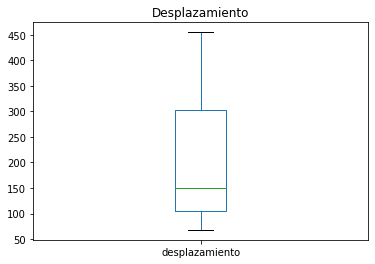

In [18]:
print('Asimetría desplazamiento')
print(asimetria_desplazamiento)
autos['desplazamiento'].plot.box(title='Desplazamiento')

Asimetría milas por galón
0.45706634399491936


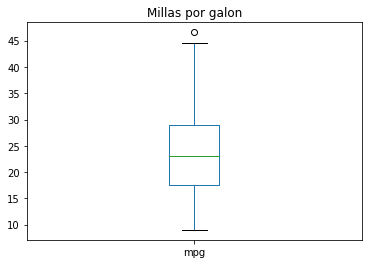

In [19]:
print('Asimetría milas por galón')
print(asimetria_mpg)
autos['mpg'].plot.box(title='Millas por galon')

In [ ]:
print('Asimetría aceleración')
print(asimetria_aceleracion)
autos['aceleracion'].plot.box(title='Aceleracion')